# Project Description:


In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report
sns.set()

In [150]:
# load the given dataset 
data=pd.read_csv(r"C:\Users\Lenovo\Desktop\ML projects\ML- Logistic Regression Titanic Survival\ML Project - Logistic Regression Titanic Survival U16955478860.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
#check data shape
data.shape

(891, 12)

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [153]:
# check null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#handling missing values

In [154]:
data=data.drop("Cabin",axis=1)

In [155]:
data["Age"]=data["Age"].fillna(data["Age"].mean())

In [156]:
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])

In [157]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [158]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


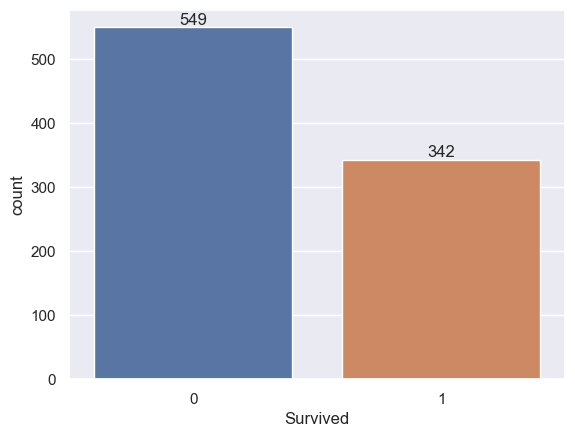

In [186]:
# making a count plot for "servived" column
ax=sns.countplot(x="Survived",data=data)
ax.bar_label(ax.containers[0])
plt.show()

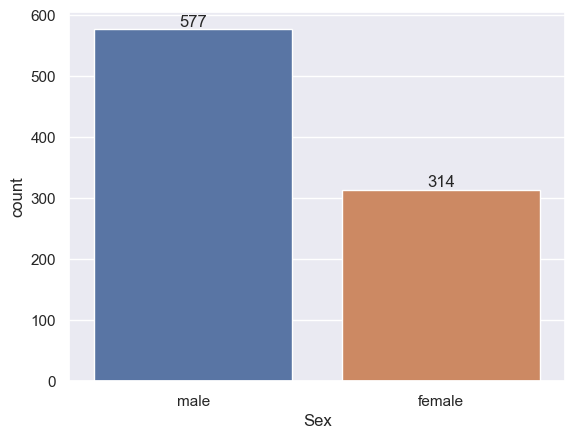

In [187]:
# making a count plot for "Gender" column
ax=sns.countplot(x="Sex",data=data)
ax.bar_label(ax.containers[0])
plt.show()

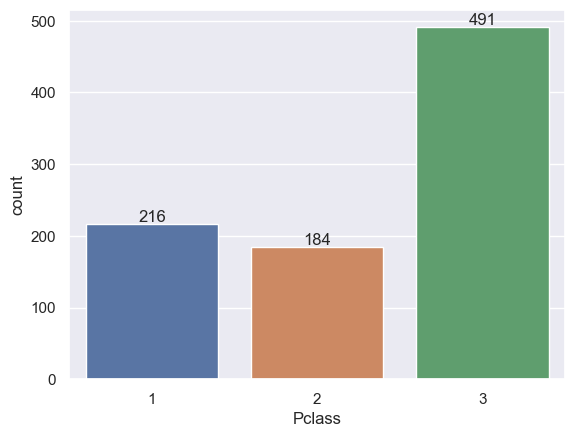

In [188]:
# making a count plot for "Pclass" column
ax=sns.countplot(x="Pclass",data=data)
ax.bar_label(ax.containers[0])
plt.show()

In [207]:
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [208]:
# convert categorical data to numerical data
from sklearn.preprocessing  import LabelEncoder
LE={}
for i in data.select_dtypes(include=["object"]).columns:
    LE[i]=LabelEncoder()
    data[i]=LE[i].fit_transform(data[i])

In [209]:
x=data.drop("Survived",axis=1)
y=data["Survived"]


In [210]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2)

In [211]:
#working with model
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

In [212]:

model.fit(x_train,y_train)

LogisticRegression()

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [214]:
y_predicted=model.predict(x_test)
y_predicted

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [216]:
print('Accuracy score of test data : ', accuracy_score(y_test, y_predicted))
print("Precision score:",precision_score(y_test, y_predicted))
print("Recall score:",recall_score(y_test, y_predicted))

Accuracy score of test data :  0.7877094972067039
Precision score: 0.847457627118644
Recall score: 0.6329113924050633


<Axes: >

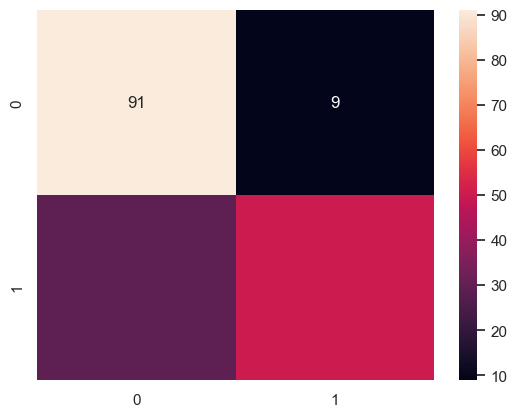

In [223]:
sns.heatmap(confusion_matrix(y_test, y_predicted),annot=True)

In [228]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       100
           1       0.85      0.63      0.72        79

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.78       179

